In [ ]:

# Clone the GitHub repository
!git clone https://github.com/rugvedmhatre/Multimodal-Sentiment-Analysis.git
%cd Multimodal-Sentiment-Analysis


Cloning into 'Multimodal-Sentiment-Analysis'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 207 (delta 28), reused 30 (delta 11), pack-reused 141 (from 1)
Receiving objects: 100% (207/207), 279.75 MiB | 49.19 MiB/s, done.
Resolving deltas: 100% (66/66), done.
Updating files: 100% (72/72), done.
/content/Multimodal-Sentiment-Analysis


In [ ]:

# Add project directory to Python path
import sys
sys.path.append('/content/Multimodal-Sentiment-Analysis')


In [ ]:
!pip install torch==1.12.1 torchtext==0.13.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 410.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.0+cpu
    Uninstalling torch-2.5.0+cpu:
      Successfully uninstalled torch-2.5.0+cpu
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.0+cpu requires torch==2.5.0, but you have torch 1.12.1 which is incompatible.
torchvision 0.20.0+cpu requires torch==2.5.0, but you have torch 1.12.1 which is incompatible.


In [ ]:

# Install required libraries
!pip install numpy matplotlib gdown
import importlib


In [ ]:
!find /content/Multimodal-Sentiment-Analysis -name "get_data.py"


/content/Multimodal-Sentiment-Analysis/notebooks/helpers/data/get_data.py


In [ ]:
!ls /content/Multimodal-Sentiment-Analysis/notebooks/helpers


data  eval  fusions  objective_functions  robustness  training	unimodals  utils


In [ ]:
import sys
sys.path.append('/content/Multimodal-Sentiment-Analysis/notebooks')


In [ ]:
from notebooks.helpers.data.get_data import get_dataloader


# Datasets

In this notebook, we get the CMU-MOSI and CMU-MOSEI dataset from CMU's Google Drive Directory. This directory has the the pickle files that we require for our project.

## Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# !mkdir data
# !pip install gdown

## Importing Helper Functions

In [ ]:
from helpers.data.get_data import get_dataloader

## Downloading CMU-MOSI Dataset

We download the pickle file from the Google Drive links from the documentation...

### mosi_raw.pkl

In [ ]:
!cd data
# !gdown https://drive.google.com/u/0/uc?id=1szKIqO0t3Be_W91xvf6aYmsVVUa7wDHU

/bin/bash: line 1: cd: data: No such file or directory


### mosi_data.pkl

In [ ]:
!gdown --fuzzy "https://drive.google.com/file/d/1_XdzdW8UNG1TTS6QcX10uhoS6N11OBit/view?usp=share_link"

Downloading...
From (original): https://drive.google.com/uc?id=1_XdzdW8UNG1TTS6QcX10uhoS6N11OBit
From (redirected): https://drive.google.com/uc?id=1_XdzdW8UNG1TTS6QcX10uhoS6N11OBit&confirm=t&uuid=2945aa88-24a4-4b65-ab50-cb7e0494c759
To: /content/Multimodal-Sentiment-Analysis/mosi_data.pkl
100% 154M/154M [00:01<00:00, 79.8MB/s]


## Exploring CMU-MOSI Dataset

In [ ]:
traindata, validdata, testdata = get_dataloader(
    '/scratch/rrm9598/data/mosi_raw.pkl', robust_test=False, max_pad=True, data_type='mosi', max_seq_len=50)

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/rrm9598/data/mosi_raw.pkl'

Verifying the train, validation and test data size.

In [ ]:
traindata_size = len(traindata.dataset)
validdata_size = len(validdata.dataset)
testdata_size = len(testdata.dataset)

print("Train Data Size      :", traindata_size)
print("Validation Data Size :", validdata_size)
print("Test  Data Size      :", testdata_size)

totaldata_size = traindata_size + validdata_size + testdata_size
print("Total Data Size      :", totaldata_size)

Train Data Size      : 1283
Validation Data Size : 214
Test  Data Size      : 686
Total Data Size      : 2183


In [ ]:
for batch in traindata:
    inputs = batch
    break

In [ ]:
print("Shape of input sample:", len(inputs))
print("Shape of input item 1:", inputs[0].shape)
print("Shape of input item 2:", inputs[1].shape)
print("Shape of input item 3:", inputs[2].shape)
print("Shape of input item 4:", inputs[3].shape)

Shape of input sample: 4
Shape of input item 1: torch.Size([32, 50, 35])
Shape of input item 2: torch.Size([32, 50, 74])
Shape of input item 3: torch.Size([32, 50, 300])
Shape of input item 4: torch.Size([32, 1])


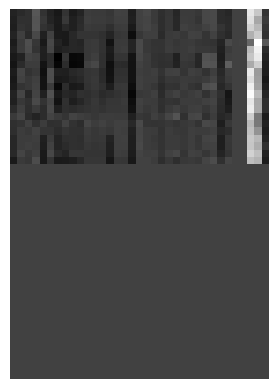

In [ ]:
plt.imshow(inputs[0][0], cmap='gray')
plt.axis('off')
plt.show()

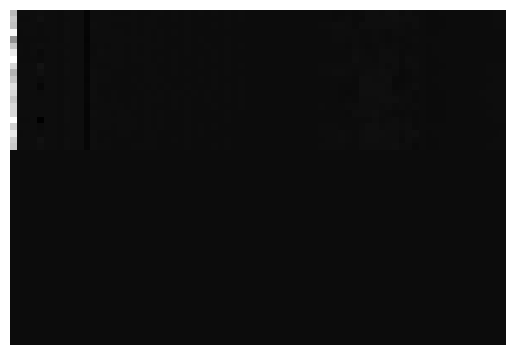

In [ ]:
plt.imshow(inputs[1][0], cmap='gray')
plt.axis('off')
plt.show()

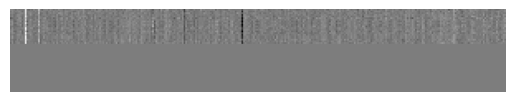

In [ ]:
plt.imshow(inputs[2][0], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
inputs[3][0]

tensor([-2.2500])

## Downloading CMU-MOSEI Dataset

### mosei_raw.pkl

In [ ]:
!gdown --fuzzy "https://drive.google.com/file/d/1zFOBHijVppTiyteSsi0aTFYPEsda_AOk/view?usp=drive_link"

Downloading...
From (original): https://drive.google.com/uc?id=1zFOBHijVppTiyteSsi0aTFYPEsda_AOk
From (redirected): https://drive.google.com/uc?id=1zFOBHijVppTiyteSsi0aTFYPEsda_AOk&confirm=t&uuid=5bd01dc8-09ed-4ac9-bc7e-64a6f47dabc8
To: /content/Multimodal-Sentiment-Analysis/mosei_raw.pkl
100% 9.94G/9.94G [00:57<00:00, 174MB/s]


### mosei_data.pkl

In [ ]:
!gdown --fuzzy "https://drive.google.com/file/d/180l4pN6XAv8-OAYQ6OrMheFUMwtqUWbz/view?usp=share_link"

Downloading...
From (original): https://drive.google.com/uc?id=180l4pN6XAv8-OAYQ6OrMheFUMwtqUWbz
From (redirected): https://drive.google.com/uc?id=180l4pN6XAv8-OAYQ6OrMheFUMwtqUWbz&confirm=t&uuid=1e3ed1ea-34e7-4524-b017-0f84c50fb924
To: /content/Multimodal-Sentiment-Analysis/mosei_senti_data.pkl
100% 3.73G/3.73G [00:23<00:00, 157MB/s]


## Exploring CMU-MOSEI Dataset

In [ ]:
traindata, validdata, testdata = get_dataloader('/content/Multimodal-Sentiment-Analysis/mosei_raw.pkl', data_type='mosei')

In [ ]:
traindata_size = len(traindata.dataset)
validdata_size = len(validdata.dataset)
testdata_size = len(testdata.dataset)

print("Train Data Size      :", traindata_size)
print("Validation Data Size :", validdata_size)
print("Test  Data Size      :", testdata_size)

totaldata_size = traindata_size + validdata_size + testdata_size
print("Total Data Size      :", totaldata_size)

Train Data Size      : 16327
Validation Data Size : 1871
Test  Data Size      : 4662
Total Data Size      : 22860


In [ ]:
for batch in traindata:
    inputs = batch
    break

In [ ]:
print("Shape of input sample:", len(inputs))
print("Shape of input item 1:", len(inputs[0]))
print("\tShape of input item 1, item 1:", inputs[0][0].shape)
print("\tShape of input item 1, item 2:", inputs[0][1].shape)
print("\tShape of input item 1, item 3:", inputs[0][2].shape)
print("Shape of input item 2:", len(inputs[1]))
print("\tShape of input item 2, item 1:", inputs[1][0].shape)
print("\tShape of input item 2, item 2:", inputs[1][1].shape)
print("\tShape of input item 2, item 3:", inputs[1][2].shape)
print("Shape of input item 3:", inputs[2].shape)
print("Shape of input item 4:", inputs[3].shape)

Shape of input sample: 4
Shape of input item 1: 3
	Shape of input item 1, item 1: torch.Size([32, 50, 713])
	Shape of input item 1, item 2: torch.Size([32, 50, 74])
	Shape of input item 1, item 3: torch.Size([32, 50, 300])
Shape of input item 2: 3
	Shape of input item 2, item 1: torch.Size([32])
	Shape of input item 2, item 2: torch.Size([32])
	Shape of input item 2, item 3: torch.Size([32])
Shape of input item 3: torch.Size([32, 1])
Shape of input item 4: torch.Size([32, 1])


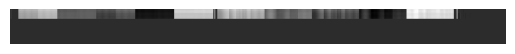

In [ ]:
plt.imshow(inputs[0][0][0], cmap='gray')
plt.axis('off')
plt.show()

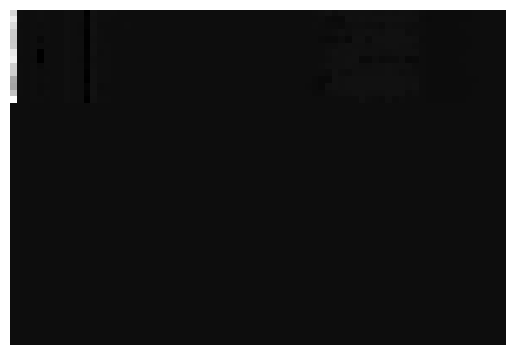

In [ ]:
plt.imshow(inputs[0][1][0], cmap='gray')
plt.axis('off')
plt.show()

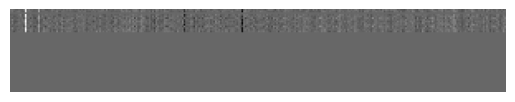

In [ ]:
plt.imshow(inputs[0][2][0], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
inputs[1][0]

tensor([14, 10, 23, 18, 15, 34, 50, 15, 22, 18, 18,  8, 13, 19, 42, 16, 25, 16,
        26, 34, 11, 39, 24, 12,  4, 42, 11, 50, 21, 11, 10,  7])

In [ ]:
inputs[1][1]

tensor([14, 10, 23, 18, 15, 34, 50, 15, 22, 18, 18,  8, 13, 19, 42, 16, 25, 16,
        26, 34, 11, 39, 24, 12,  4, 42, 11, 50, 21, 11, 10,  7])

In [ ]:
inputs[1][2]

tensor([14, 10, 23, 18, 15, 34, 50, 15, 22, 18, 18,  8, 13, 19, 42, 16, 25, 16,
        26, 34, 11, 39, 24, 12,  4, 42, 11, 50, 21, 11, 10,  7])

In [ ]:
inputs[2]

tensor([[ 8101],
        [10560],
        [13838],
        [14129],
        [12262],
        [ 6719],
        [ 5305],
        [ 5763],
        [ 9473],
        [   36],
        [15953],
        [ 5893],
        [12719],
        [12937],
        [ 1670],
        [ 8917],
        [14344],
        [ 5688],
        [ 2856],
        [12991],
        [10423],
        [ 9763],
        [ 5830],
        [12284],
        [ 5473],
        [14090],
        [ 5263],
        [13618],
        [ 1149],
        [ 7762],
        [ 1803],
        [10682]])

In [ ]:
inputs[3]

tensor([[ 0.0000],
        [ 1.6667],
        [ 1.3333],
        [ 0.0000],
        [-0.6667],
        [-0.6667],
        [-1.0000],
        [ 0.0000],
        [ 0.3333],
        [ 0.6667],
        [ 1.0000],
        [ 0.6667],
        [ 0.0000],
        [ 0.0000],
        [ 2.3333],
        [-0.3333],
        [ 0.0000],
        [ 0.6667],
        [-1.6667],
        [ 1.3333],
        [ 1.0000],
        [ 0.3333],
        [-1.6667],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.6667],
        [ 1.6667],
        [ 0.0000],
        [-1.6667],
        [-1.0000],
        [ 0.3333]])